In [1]:
# Intro to Data Science, Fall 2019 @ CCNY
# CSC-599.70-Course-Project
# Team Member & Name: RentAdvisor (3-Member)

# HASIBUL ISLAM
# DZHONIBEK PARMANKULOV
# ABDUR RAFEY

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
import warnings
%matplotlib inline

In [3]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
submit1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)


In [4]:
train_df.sample(5)

,addr_unit,building_id,bedrooms,bathrooms,size_sqft,created_at,addr_street,addr_city,addr_zip,addr_lat,...,has_garden,has_childrens_playroom,rent,no_fee,description,neighborhood,borough,unit,floornumber,line
rental_id,,,,,,,,,,,,,,,,,,,,,
7199821,#7,1275004,1,1.0,750.0,2018-05-22 15:28:15,28-05 43 STREET,Astoria,11103,40.764071,...,0,0,1899,0,FIRST MONTH FREE\r\n\r\n***HEAT AND HOT WATER ...,Astoria,Queens,7,NaN,NaN
7159303,#3C,148975,2,1.0,879.0,2018-05-08 18:07:52,43 COLUMBIA PLACE,Brooklyn,11201,40.692646,...,0,0,4100,1,NO FEE\n\nExquisite luxury 2-bedroom and 2-bat...,Brooklyn Heights,Brooklyn,3C,3.0,C
7378294,#3,282415,3,1.0,0.0,2018-07-18 12:05:58,744 WILLOUGHBY AVENUE,Brooklyn,11206,40.694795,...,0,0,2730,1,NO FEE!!! Brand new construction!!!\nAmazing l...,Bedford-Stuyvesant,Brooklyn,3,3.0,NaN
7182343,#15,147244,1,1.0,700.0,2018-05-16 12:09:36,185 COLUMBIA HEIGHTS,Brooklyn,11201,40.696859,...,0,0,2895,0,"Just Listed, Available July 1st\n\nThis Newly ...",Brooklyn Heights,Brooklyn,15,NaN,NaN
7200001,#2F,165202,2,2.0,949.0,2018-05-22 16:05:29,335 CARROLL STREET,Brooklyn,11231,40.679413,...,0,0,4583,1,AVAILABLE JULY 23rd. Please note: Photos are o...,Carroll Gardens,Brooklyn,2F,2.0,F


In [5]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',
    'addr_zip','floor_count',#'has_elevator',#'has_dishwasher',	#'is_furnished',	
    'has_gym','allows_pets',#'has_garage',
    'has_concierge',#'has_pool',#'has_garden',	
    #the reason of commenting out certain feature is because they are increasing mean squared error
]
train_features = train_df[feature_cols] 

# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']

In [6]:
# using linear regression method
lreg = LinearRegression()
lreg.fit(train_features, train_target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [7]:
test_features = test_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.median(), axis=0)

# construct predictions 
test_df['predicted'] = lreg.predict(test_features)
print("Prediction using Linear Regression train data against Test1:")

print("Mean Squared Error for Test1 using Linear Regression:",mean_squared_error(test_df['rent'], test_df['predicted']))

Prediction using Linear Regression train data against Test1:
Mean Squared Error for Test1 using Linear Regression: 3313817.1438688915


In [8]:
rf = RandomForestRegressor()
rf.fit(train_features, train_target)

# construct predictions 
test_df['predicted'] = rf.predict(test_features)
print("Prediction using Random Forest Regressor train data against Test1:")
print("Mean Squared Error for Test1 using Random Forest Regressor:",mean_squared_error(test_df['rent'], test_df['predicted']))

C:\Users\Joni\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Prediction using Random Forest Regressor train data against Test1:
Mean Squared Error for Test1 using Random Forest Regressor: 1994797.3506749347


In [9]:
#joining training data and test1 data to incredase total training data
master_df = train_df.append(test_df, sort=False)

master_features = master_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
master_target = master_df['rent']
#linear regression
#lreg.fit(master_features, master_target)

#Random Forest Regressor
rf.fit(master_features, master_target)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
#handling missing data
submit1_features = submit1_df[feature_cols].fillna(master_df[feature_cols].median(), axis=0)
submit1_features.sample(10)

,bedrooms,year_built,bathrooms,min_to_subway,size_sqft,no_fee,has_doorman,addr_zip,floor_count,has_gym,allows_pets,has_concierge
rental_id,,,,,,,,,,,,
7499233,2,1905.0,1.0,2.8833,850.0,0,0,10038,5.0,0,0,0
7489237,3,1920.0,1.0,1.9167,900.0,0,0,11217,2.0,0,0,0
7469845,2,1965.0,1.0,2.4667,924.0,1,1,10023,34.0,0,1,1
7477789,3,1925.0,1.0,8.2000,800.0,0,0,11228,2.0,0,0,0
7437478,2,1928.0,1.0,0.4500,1000.0,0,0,11222,4.0,0,1,0
7473829,2,0.0,2.0,103343.6167,985.0,0,0,11217,0.0,0,0,0
7476025,1,2016.0,1.0,1.2333,683.0,1,1,10001,47.0,1,1,1
7446928,0,1924.0,1.0,1.1333,500.0,0,0,11106,3.0,0,0,0
7441621,2,1920.0,1.0,0.4333,1000.0,0,0,11211,4.0,0,1,0


In [11]:
#submit1_features = submit1_df[feature_cols].fillna(submit1_df[feature_cols].median(), axis=0)
submit1_df['rent'] = rf.predict(submit1_features)
submit1_df['rent'].to_csv('test2.csv', header=True)

#these part has to be changed
#submit1_df['median_rent'] = np.ones(submit1_df['rent'].shape) * master_target.median()
#print("Prediction of rent for Test2")
#print("Mean Squared error for Test2: ",mean_squared_error(submit1_df['rent'], submit1_df['median_rent']))

In [12]:
submit1_df['rent'].sample(10)

rental_id
7479850    1510.000000
7460761    1604.100000
7460221    4102.400000
7498321    6395.000000
7459573    3188.932143
7444468    1932.500000
7431697    2763.700000
7437919    1743.333333
7437646    2177.550000
7439626    3214.300000
Name: rent, dtype: float64

In [13]:
#

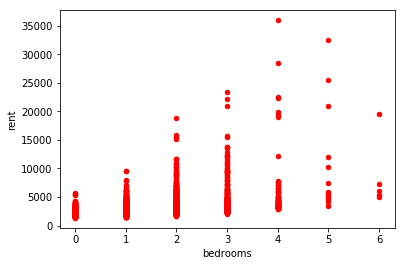

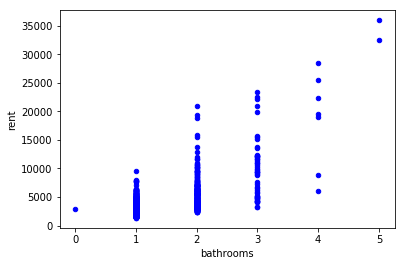

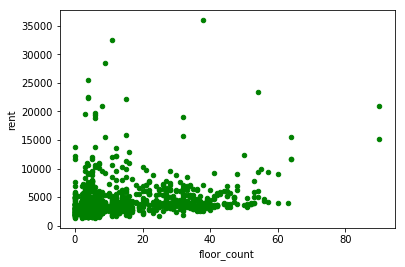

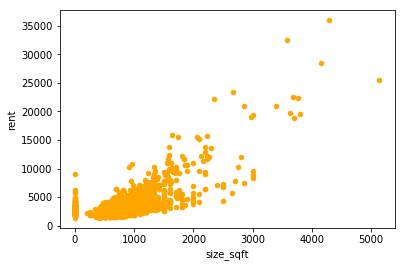

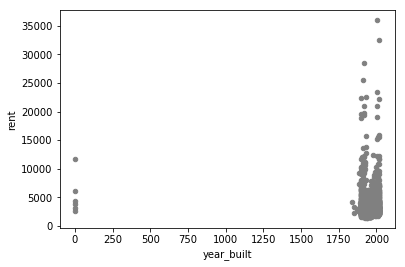

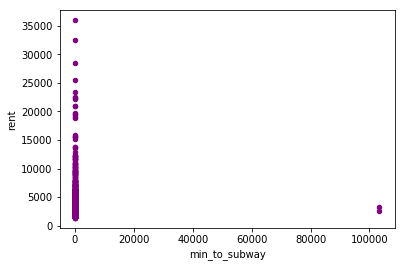

In [14]:
# Scatter plots of different features for test2 data: 

submit1_df.plot(kind='scatter',x='bedrooms',y='rent',color='red')
plt.show()

submit1_df.plot(kind='scatter',x='bathrooms',y='rent',color='blue')
plt.show()

submit1_df.plot(kind='scatter',x='floor_count',y='rent',color='green')
plt.show()

submit1_df.plot(kind='scatter',x='size_sqft',y='rent',color='orange')
plt.show()

submit1_df.plot(kind='scatter',x='year_built',y='rent',color='gray')
plt.show()

submit1_df.plot(kind='scatter',x='min_to_subway',y='rent',color='purple')
plt.show()

#lines = submit1_df.plot.line(x='bedrooms',y='rent')

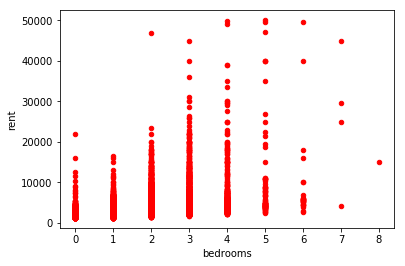

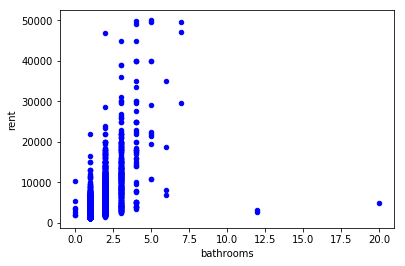

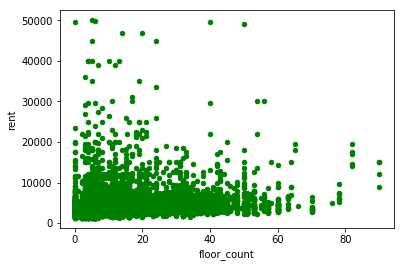

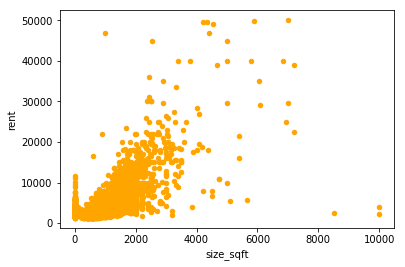

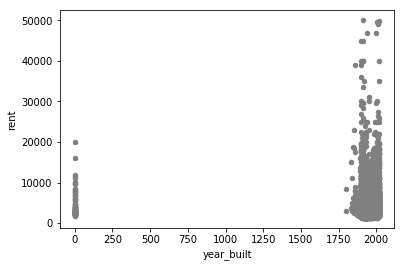

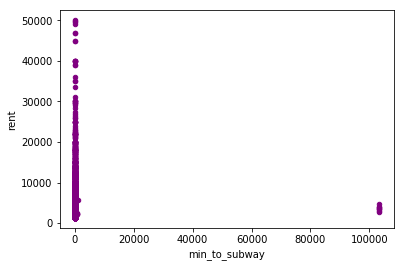

In [15]:
# Scatter plots of different features for training data: 

master_df.plot(kind='scatter',x='bedrooms',y='rent',color='red')
plt.show()

master_df.plot(kind='scatter',x='bathrooms',y='rent',color='blue')
plt.show()

master_df.plot(kind='scatter',x='floor_count',y='rent',color='green')
plt.show()

master_df.plot(kind='scatter',x='size_sqft',y='rent',color='orange')
plt.show()

master_df.plot(kind='scatter',x='year_built',y='rent',color='gray')
plt.show()

master_df.plot(kind='scatter',x='min_to_subway',y='rent',color='purple')
plt.show()




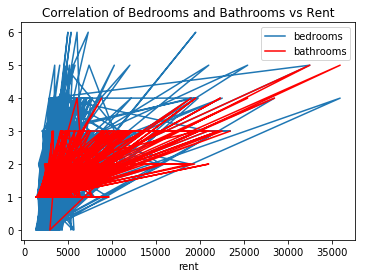

In [16]:
ax = plt.gca()
submit1_df.plot(kind='line',x='rent',y='bedrooms',title='Correlation of Bedrooms and Bathrooms vs Rent',ax=ax)
submit1_df.plot(kind='line',x='rent',y='bathrooms', color='red', ax=ax)
#submit1_df.plot(kind='line',x='rent',y='floornumber', color='green', ax=ax)
plt.show()

In [17]:
#OLS Regression Results for Testing2 Data
# Add a constant to our existing dataframe for modeling purposes
submit1_df = sm.add_constant(submit1_df)

est = sm.OLS(submit1_df['rent'], 
             submit1_features[['bedrooms', 'year_built', 'bathrooms', 'min_to_subway','size_sqft', 'no_fee', 'has_doorman','addr_zip','floor_count','has_gym','allows_pets']]
            ).fit()

print(est.summary())



                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     1588.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:42:28   Log-Likelihood:                -17318.
No. Observations:                2000   AIC:                         3.466e+04
Df Residuals:                    1989   BIC:                         3.472e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms        199.7667     37.691      5.300

In [18]:
#OLS Regression Results for Trainin Data
# Add a constant to our existing dataframe for modeling purposes
master_df = sm.add_constant(master_df)

est = sm.OLS(master_df['rent'], 
             master_features[['bedrooms', 'year_built', 'bathrooms', 'min_to_subway','size_sqft', 'no_fee', 'has_doorman','addr_zip','floor_count','has_gym','allows_pets']]
            ).fit()

print(est.summary())


                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     6487.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:42:28   Log-Likelihood:            -1.2528e+05
No. Observations:               14000   AIC:                         2.506e+05
Df Residuals:                   13989   BIC:                         2.507e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms        145.6283     19.185      7.591